# OF-driven Gaussian denoising

In [ ]:
!which python

In [ ]:
#!pip install --upgrade pip

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
#import kernels
#import _2D_OF_denoising2 as _2D_OF_denoising

In [2]:
!pip uninstall -y "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"

In [3]:
# Run this cell when image_denoising is installed as a package

#!pip install "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"
#!pip show image_denoising
#import image_denoising

In [4]:
import image_denoising

In [5]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [6]:
!rm barb.png.?
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2023-07-31 23:33:36--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232140 (227K) [image/png]
Saving to: ‘barb.png.1’

barb.png.1          100%[===================>] 226,70K  1,03MB/s    in 0,2s    

2023-07-31 23:33:36 (1,03 MB/s) - ‘barb.png.1’ saved [232140/232140]



In [7]:
img = gray_image.read("barb.png")

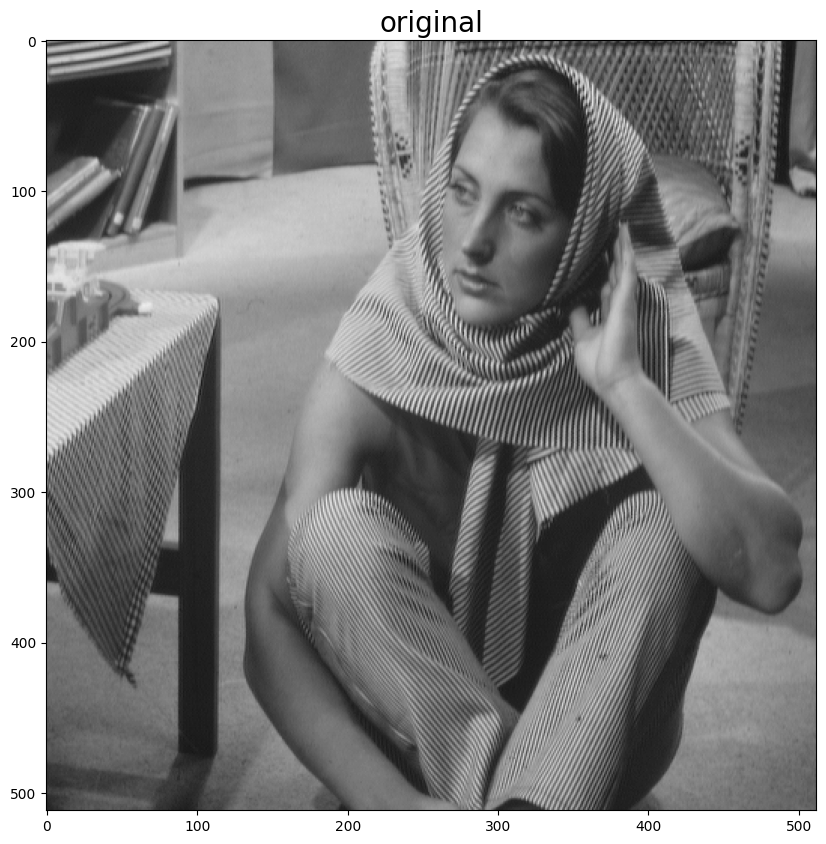

In [8]:
gray_image.show(img, "original")

In [9]:
mean = 0
var = 200
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip((img + noise), 0, 255).astype(np.uint8)

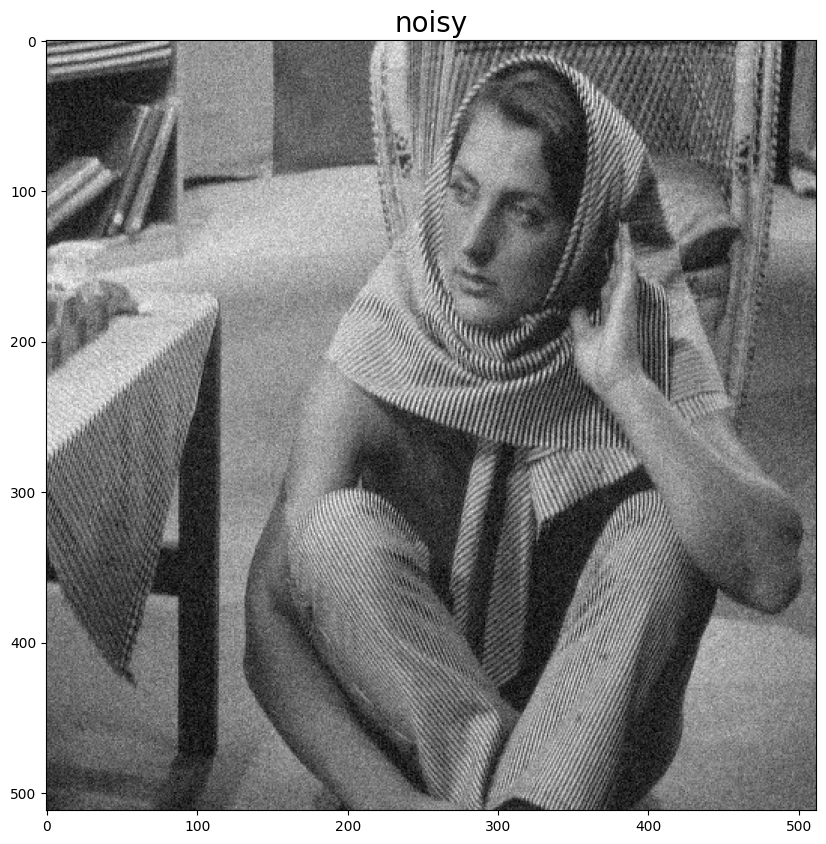

In [10]:
gray_image.show(noisy_img, "noisy")

## Gaussian

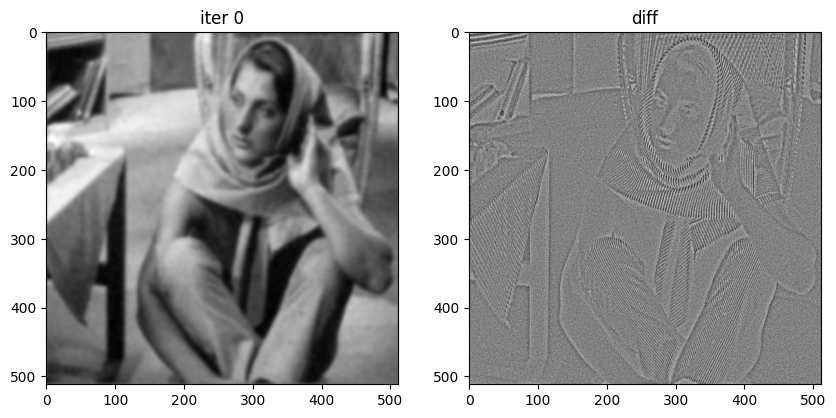


iter=0
CPU times: user 293 ms, sys: 150 ms, total: 442 ms
Wall time: 243 ms


In [11]:
%%time

GD__N_iters = 1
GD__sigma = 2.5

denoised = image_denoising.gaussian.filter_gray_image(noisy_img, GD__sigma, GD__N_iters)

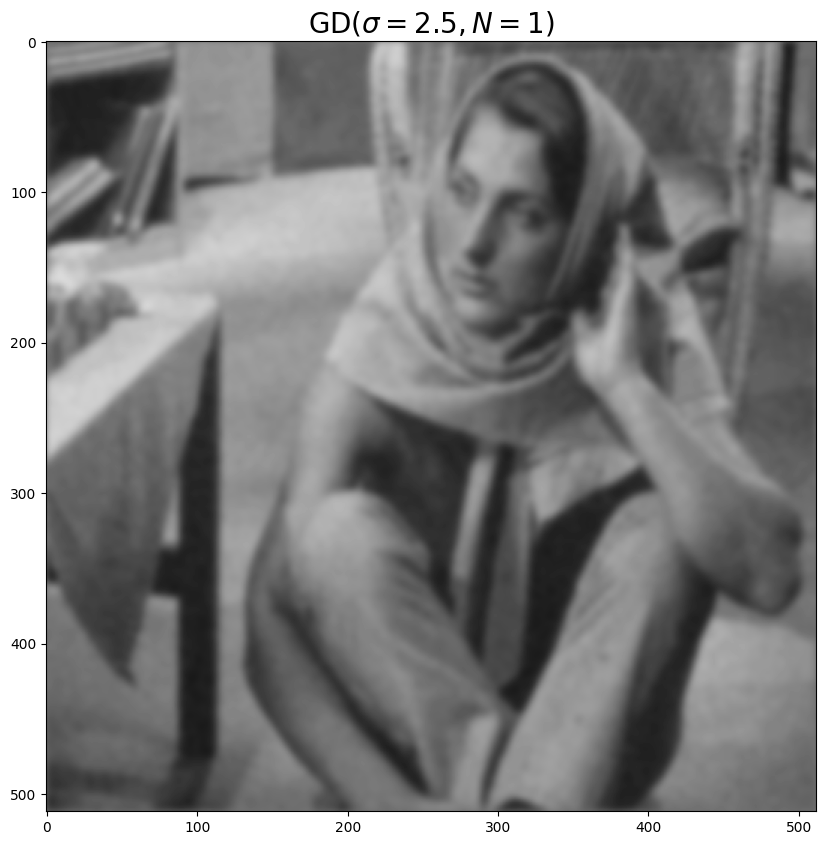

In [12]:
gray_image.show(denoised, "GD" + "($\sigma=" + f"{GD__sigma}, N={GD__N_iters}$)")

## OF-driven Gaussian

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 1
OFGD__w = 9
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 3
OFGD__l = 1
OFGD__w = 9
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 9
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "denoised")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 0.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 0.25

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 0.25

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 0.25

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 7
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 3.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 15
OFGD__sigma_OF = 2.5

denoised = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

## OF-driven Random

In [13]:
OFRD__N_iters = 50
OFRD__sigma_random = 1.0
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.denoise(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

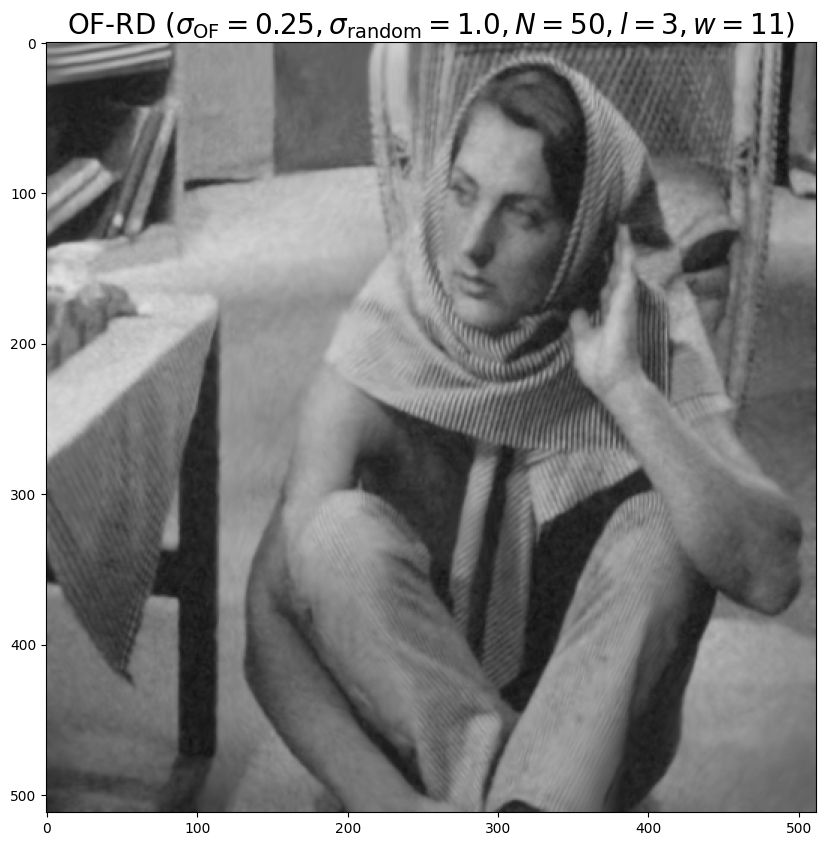

In [15]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [16]:
OFRD__N_iters = 50
OFRD__sigma_random = 1.0
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 1.25

denoised, _ = image_denoising.OF_random.denoise(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

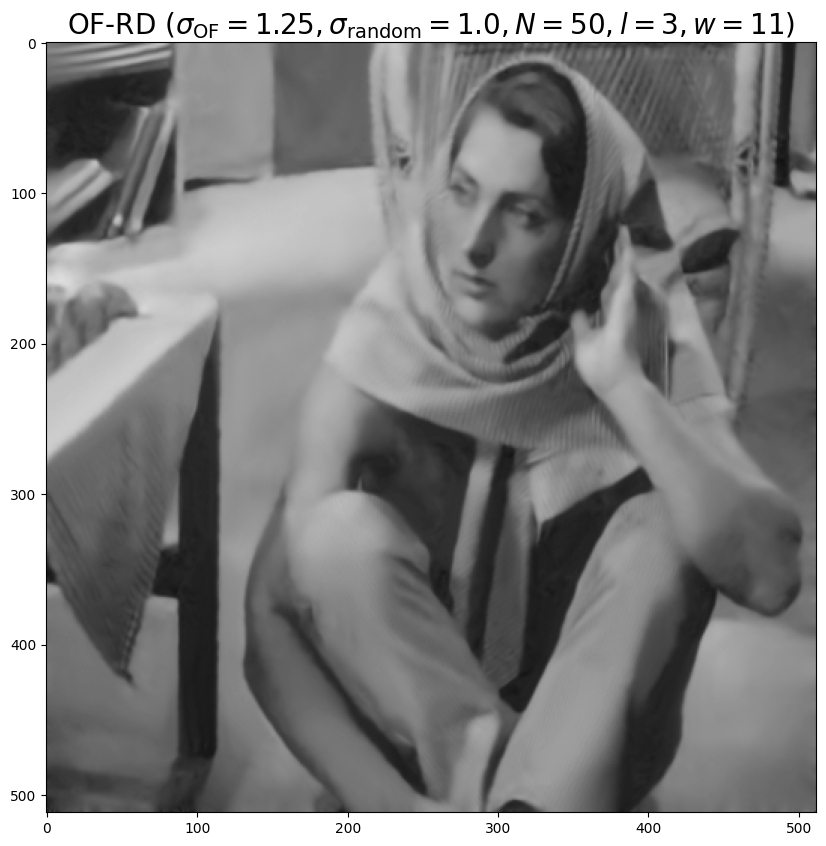

In [17]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
input()

## Old stuff

In [ ]:
denoised_img = _2D_OF_denoising.filter(noisy_img, kernel, l=1, w=33)

In [ ]:
gray_image.show(denoised_img, "denoised")

In [ ]:
print(f"time: {time.process_time()} seconds")

In [ ]:
!pip install mrcfile
import mrcfile

In [ ]:
input_format = "rec"
tomogram_name = "/home/vruiz/Descargas/TS01-wbp"
tomogram_MRC = mrcfile.open(f'{tomogram_name}.{input_format}')
print(f"tomogram_name={tomogram_name} type={tomogram_MRC.data.dtype} shape={tomogram_MRC.data.shape}")
tomogram = tomogram_MRC.data

In [ ]:
denoised_tomogram = _2D_OF_denoising.filter_over_Y(tomogram, kernel, l=2, w=3)

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2

In [ ]:
def g(z=0):
  #cv2_imshow(cv2.normalize(tomogram[z, :, :][0:200,0:200].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  #cv2_imshow(cv2.normalize(tomogram[z, :, :].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(denoised_tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=100)
interactive_plot

In [ ]:
fake_tomogram = np.stack([np.roll(noisy_img,0) for i in range(64)])

In [ ]:
def g(z=0):
  plt.imshow(cv2.normalize(fake_tomogram[:, z, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=10)
interactive_plot

In [ ]:
fake_denoised_tomogram = _2D_OF_denoising.filter_over_X(fake_tomogram, kernel, l=2, w=3)

In [ ]:
try:
    import optical_flow as motion
    import display
    import prediction
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    from motion_estimation import optical_flow as motion
    from motion_estimation import display
    from motion_estimation import prediction

In [ ]:
initial_MVs = np.zeros((fake_tomogram[:, 0, :].shape[0], fake_tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=fake_tomogram[:, 10, :], reference=fake_tomogram[:, 15, :], initial_MVs=initial_MVs)

In [ ]:
#display.show_vectors(MVs[::1, ::1])
display.show_vectors(MVs)

In [ ]:
np.max(MVs)

In [ ]:
MVs[32,...]

In [ ]:
initial_MVs = np.zeros((tomogram[:, 0, :].shape[0], tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=tomogram[:, 1, :], reference=tomogram[:, 2, :], initial_MVs=initial_MVs)

In [ ]:
np.max(MVs)

In [ ]:
tomogram.dtype

In [ ]:
fake_tomogram.dtype

In [ ]:
RGB_image.show(display.colorize(MVs))